## 6_6.多項式回帰


In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# 0.0〜5.0の範囲で乱数を20生成し，20行，１列の行列に格納．これを説明変数のデータとする
X = np.random.uniform(0.0, 5.0, (20, 1))

# 1/4*2*np.pi*Xの正弦(サイン)を求めて1次元配列に変換し、
# ノイズを加えて20個の目的変数を作成する
Y = np.sin(1/4*2*np.pi*X).ravel() + np.random.normal(0, 0.2, 20)

# 3次式の多項式（の行列）を生成する
# include_bias=Falseでパラメータを設定しないようにする
poly = PolynomialFeatures(degree=3, include_bias=False)

# 多項式に説明変数を入力して計算する
X_pol = poly.fit_transform(X)

# 線形回帰モデルを生成
model = LinearRegression()
# 多項式での計算結果と目的変数を設定して学習を開始
model.fit(X_pol, Y)

# 回帰係数と定数項を出力
print('係数:', model.coef_)
print('定数項:', model.intercept_)

係数: [ 1.06000549 -1.12796119  0.19720394]
定数項: 0.8204827135028393


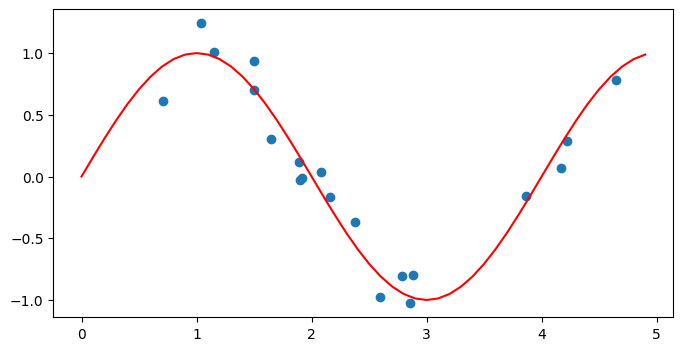

In [2]:
import matplotlib.pyplot as plt

# グラフ領域のサイズを指定
plt.figure(figsize=(8, 4))

# 予測に使用する説明変数のデータを50個生成し，50行，１列の行列にする
X_test = np.arange(0, 5, 0.1)[:, np.newaxis]
# 多項式の計算行列にX_testを入力して計算のみを行う
X_test_poly = poly.transform(X_test)
# モデルにX_test_polyを入力して予測する
y_pred = model.predict(X_test_poly)
# 正解値を作成
y_true = np.sin(1/4*2*np.pi*X_test).ravel()

# 元の説明変数Xと目的変数yの交点にドットをプロット
plt.scatter(X, Y)
# 予測値のラインをプロット
plt.plot(X_test, y_true, color='red')
plt.show()


In [4]:
"""「California Housing」の前処理
"""
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# データセットをダウンロードしてndarrayを要素としたdictオブジェクトに格納
housing = fetch_california_housing()
# データセットをデータフレームに読み込む
# dictオブジェクトhousingからdataキーを指定して8項目のデータを抽出
# dictオブジェクトhousingからfeature_namesキーを指定して列名を抽出
df_housing = pd.DataFrame(
    housing.data, columns=housing.feature_names)

# 説明変数のデータをNumPy配列に格納
X = df_housing.values
# 目的変数のデータをNumPy配列に格納
y = housing.target

# 説明変数のデータと目的変数のデータを8:2の割合で分割する
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

"""対数変換
"""
# 'AveBedrms''AveOccup''Population''AveRooms'の列インデックスを取得
bed_index = (df_housing.columns.get_loc('AveBedrms'))
occ_index = (df_housing.columns.get_loc('AveOccup'))
pop_index = (df_housing.columns.get_loc('Population'))
room_index = (df_housing.columns.get_loc('AveRooms'))
# 訓練データの'AveBedrms''AveOccup''Population'のデータを対数変換する
X_train[:,bed_index] = np.log10(X_train[:,bed_index])
X_train[:,occ_index] = np.log10(X_train[:,occ_index])
X_train[:,pop_index] = np.log10(X_train[:,pop_index])
X_train[:,room_index] = np.log10(X_train[:,room_index])
# テストデータの'AveBedrms''AveOccup''Population''AveRooms'のデータを対数変換する
X_test[:,bed_index] = np.log10(X_test[:,bed_index])
X_test[:,occ_index] = np.log10(X_test[:,occ_index])
X_test[:,pop_index] = np.log10(X_test[:,pop_index])
X_test[:,room_index] = np.log10(X_test[:,room_index])

"""標準化
"""
# 標準化を行うStandardScalerを生成
scaler = StandardScaler()
# 訓練データを標準化する
X_train_std = scaler.fit_transform(X_train)
# 訓練データの標準化に使用したStandardScalerでテストデータを標準化する
X_test_std = scaler.transform(X_test)

In [7]:
from sklearn.preprocessing import PolynomialFeatures

# ３次の多項式（の行列）を生成する
# include_bias=Falseでバイアスパラメーターを設定しないようにする
poly = PolynomialFeatures(degree=3, include_bias=False)
# 多項式に訓練データを入力して計算する
X_train_pol = poly.fit_transform(X_train_std)
# 多項式でテストデータを計算する
X_test_pol = poly.transform(X_test_std)



In [8]:
from sklearn.linear_model import LinearRegression

# 線形回帰モデルを生成
model = LinearRegression()
# 多項式の計算結果と目的変数を設定して学習を開始
model.fit(X_train_pol, y_train)

LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error

# 多項式で計算後の訓練データをモデルに入力して予測値を取得
y_train_pred = model.predict(X_train_pol)
# 多項式で計算後のテストデータをモデルに入力して予測値を取得
y_test_pred = model.predict(X_test_pol)

# mean_squared_error()でMSEを求め，平方根をとってRMSEを求める
print('RMSE(train): %.4f' %(
    np.sqrt(mean_squared_error(y_train, y_train_pred))
))
print('RMSE(test): %.4f' %(
    np.sqrt(mean_squared_error(y_test, y_test_pred))
))


RMSE(train): 0.5686
RMSE(test): 0.6832


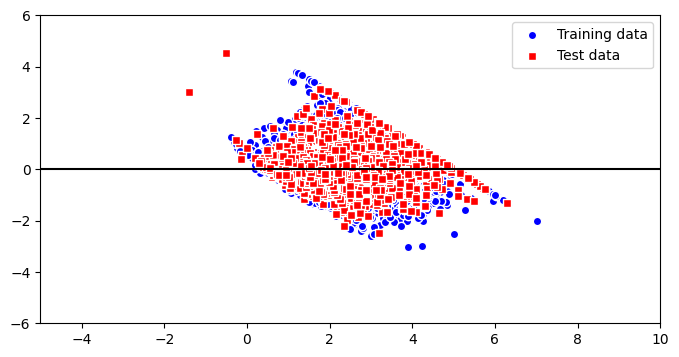

In [20]:
import matplotlib.pyplot as plt

# グラフの描画領域を設定
plt.figure(figsize=(8, 4))

# 訓練データを使用した予測値の残差をプロット
# x軸を予測値，y軸を残差にする
plt.scatter(
    y_train_pred,
    y_train - y_train_pred,
    color='blue', marker='o', edgecolor='white',
    label='Training data'
)

# テストデータを使用した予測値の残差をプロット
# x軸を予測値，y軸を残差にする
plt.scatter(
    y_test_pred,
    y_test - y_test_pred,
    color='red', marker='s', edgecolor='white',
    label='Test data'
)

# 残差０の水平線をプロット
plt.hlines(y=0, xmin=-5, xmax=10, color='black')
plt.xlim([-5, 10])
plt.ylim([-6, 6])
plt.legend()
plt.show()

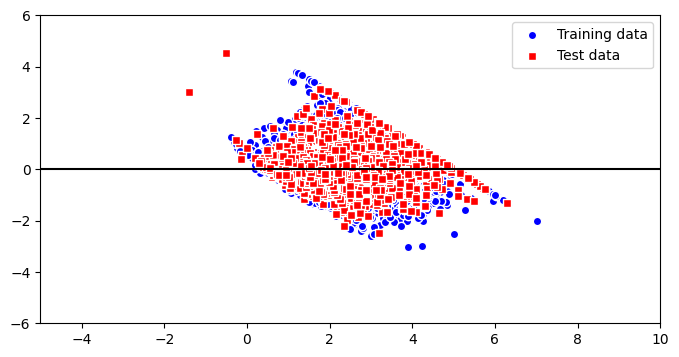

In [14]:
import matplotlib.pyplot as plt

# グラフの描画領域を設定
plt.figure(figsize=(8, 4))

# 訓練データを使用した予測値の残差をプロット
# x軸を予測値、y軸を残差にする
plt.scatter(
    y_train_pred,
    y_train - y_train_pred,
    color='blue', marker='o', edgecolor='white',
    label='Training data'
)

# テストデータを使用した予測値の残差をプロット
# x軸を予測値、y軸を残差にする
plt.scatter(
    y_test_pred,
    y_test - y_test_pred,
    color='red', marker='s', edgecolor='white',
    label='Test data'
)

# 残差0の水平線をプロット
plt.hlines(y=0, xmin=-5, xmax=10, color='black')
plt.xlim([-5, 10])
plt.ylim([-6, 6])
plt.legend()
plt.show()